## Import dependencies

In [4508]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

## Reading the dataset

In [4516]:
# Reading in the spambase data from a CSV file and storing it in a pandas dataframe
# The header parameter is set to None since the data does not contain column headers
data = pd.read_csv('spambase.data', header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Adding headers to the dataset

In [4517]:
# Open and read the file containing the column names for the spam dataset
with open('./spambase.names') as spam:
    text = spam.read()

# Use regular expression to find the column names from the text
# The column names are enclosed in a newline character followed by one or more alphanumeric characters or underscores, 
# then optionally followed by non-alphanumeric characters and a colon
labels = re.findall(r'\n(\w*_?\W?):', text)

# Read the spam dataset file into a pandas dataframe
# Specify the header as None because the column names are included in the data file
# Specify the names of the columns as the labels found earlier plus an additional 'spam' column
df = pd.read_csv('./spambase.data', header=None, names=labels + ['spam'])

df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Checking for duplicate values

In [4526]:
duplicate = df[df.duplicated()]
duplicate

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
26,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.020098,0.000000,0.012070,0.03265,0.0,0.765644,0.216495,0.132787,1.0
103,0.0,0.0,0.125490,0.0,0.0,0.108844,0.0,0.0,0.0,0.0,...,0.021437,0.019381,0.069591,0.020383,0.00000,0.0,NaN,NaN,0.477049,1.0
104,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.069555,0.062654,0.000000,0.047078,0.00000,0.0,0.771473,0.216495,0.106557,1.0
105,0.0,0.0,0.125490,0.0,0.0,0.108844,0.0,0.0,0.0,0.0,...,0.021437,0.019381,0.069591,0.020383,0.00000,0.0,NaN,NaN,0.477049,1.0
106,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.069555,0.062654,0.000000,0.047078,0.00000,0.0,0.771473,0.216495,0.106557,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.145098,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.008210,0.015074,0.000000,0.004526,0.00000,0.0,0.272073,0.556701,0.460656,0.0
4441,0.0,0.0,0.145098,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.008210,0.015074,0.000000,0.004526,0.00000,0.0,0.272073,0.556701,0.460656,0.0
4537,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.008197,0.0
4541,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.001639,0.0


## Dropping duplicate data

In [4527]:
df = df.drop_duplicates()
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.472484,0.618557,0.454098,1.0
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.705297,NaN,NaN,1.0
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,NaN,NaN,NaN,1.0
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.434939,0.402062,0.311475,1.0
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.434939,0.402062,0.311475,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.024344,0.020619,0.142623,0.0
4597,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.095148,0.030928,0.021311,0.0
4598,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.069261,0.051546,0.191803,0.0
4599,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.025201,0.041237,0.126230,0.0


## Checking for any Null values

In [4458]:
df.isnull().values.any()

False

In [4459]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

## Getting a feature correlation plot

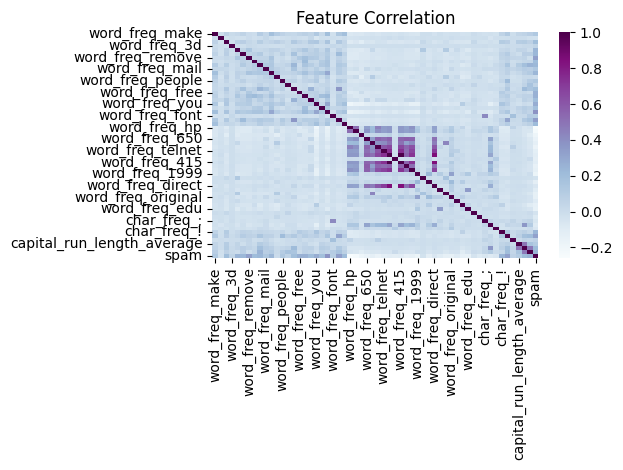

In [4518]:
# Calculate the correlation matrix of the features in the dataframe
correlation = df.corr()

# The correlation matrix shows the pairwise correlations between all the features in the dataframe
# A correlation of 1 indicates a perfect positive correlation (when one feature increases, so does the other)
# A correlation of -1 indicates a perfect negative correlation (when one feature increases, the other decreases)
# A correlation of 0 indicates no correlation between the features
# Values between -1 and 1 indicate varying degrees of correlation

# Visualize the correlation matrix using a heatmap
# The 'cmap' argument specifies the color map to use for the heatmap
sn.heatmap(correlation, cmap="BuPu")

# Add a title to the heatmap
plt.title("Feature Correlation")

# Ensure tight layout of the heatmap in the figure
plt.tight_layout()

# Show the heatmap
plt.show()

## Checking for outliers

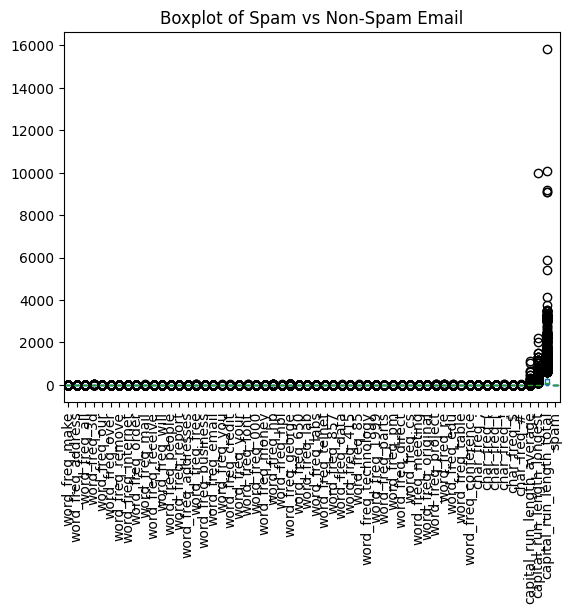

In [4519]:
# Create a boxplot of the dataframe
# The 'title' argument specifies the title of the plot
# The 'rot' argument specifies the rotation angle of the x-axis labels
df.plot.box(title='Boxplot of Spam vs Non-Spam Email', rot=90)

# Show the boxplot
plt.show()

### Boxplot of capital_run_length_total

<AxesSubplot:xlabel='capital_run_length_total'>

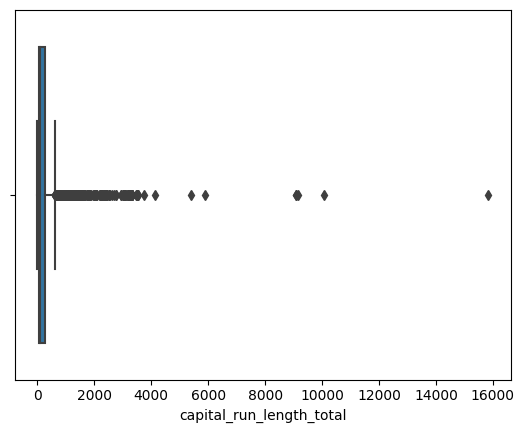

In [4463]:
sn.boxplot(x = df['capital_run_length_total'])

### Boxplot of capital_run_length_longest

<AxesSubplot:xlabel='capital_run_length_longest'>

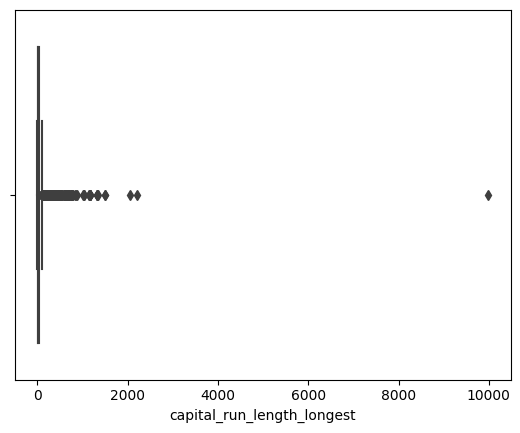

In [4464]:
sn.boxplot(x = df['capital_run_length_longest'])

### Boxplot of capital_run_length_average

<AxesSubplot:xlabel='capital_run_length_average'>

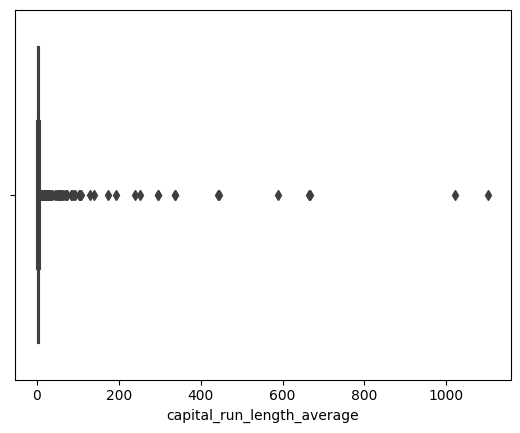

In [4465]:
sn.boxplot(x = df['capital_run_length_average'])

### Making all the outliers as Null values from IQR technique

In [4520]:
# For each of the three specified features, calculate the 75th and 25th percentiles
# using the numpy percentile function
for x in ['capital_run_length_total','capital_run_length_longest','capital_run_length_average']:
    q75, q25 = np.percentile(df.loc[:, x], [75, 25])
    
    # Calculate the interquartile range (IQR) of the feature
    intr_qr = q75 - q25
    
    # Calculate the maximum and minimum values allowed for the feature
    max_val = q75 + (1.5 * intr_qr)
    min_val = q25 - (1.5 * intr_qr)
    
    # Replace any values below the minimum or above the maximum with NaN
    df.loc[df[x] < min_val, x] = np.nan
    df.loc[df[x] > max_val, x] = np.nan

### Boxplot of capital_run_length_total without outliers

<AxesSubplot:xlabel='capital_run_length_total'>

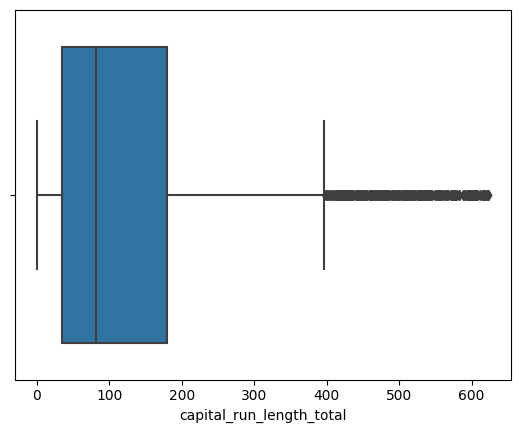

In [4467]:
sn.boxplot(x = df['capital_run_length_total'])

### Boxplot of capital_run_length_longest without outliers

<AxesSubplot:xlabel='capital_run_length_longest'>

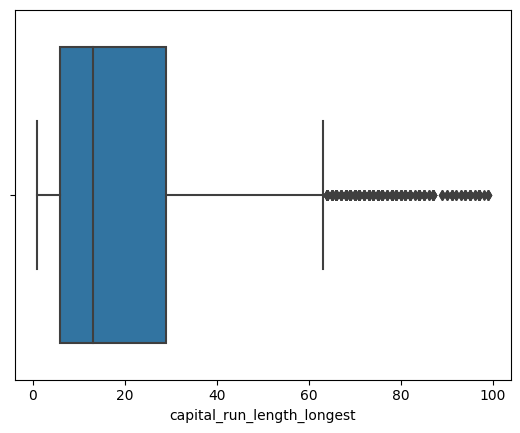

In [4470]:
sn.boxplot(x = df['capital_run_length_longest'])

### Boxplot of capital_run_length_average without outliers

<AxesSubplot:xlabel='capital_run_length_average'>

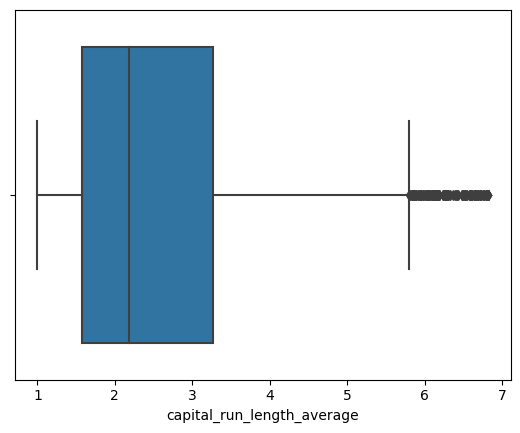

In [4471]:
sn.boxplot(x = df['capital_run_length_average'])

### Checking for Null values after turning all the outliers as Null values

In [4472]:
df.isnull().values.any()

True

In [4473]:
df.isnull().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

### Removing all the Null values

In [4521]:
# Drop all rows that contain NaN values from the dataframe
df2 = df.dropna()

# Reset the index of the dataframe after dropping NaN values
df2 = df.dropna().reset_index(drop=True)

In [4475]:
df = df2
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_nospam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


## Converting the dataframe into a numpy array

In [4476]:
dataset = df.to_numpy()
print(dataset,dataset.shape)

[[  0.     0.64   0.64 ...  61.   278.     1.  ]
 [  0.     0.     0.   ...  40.   191.     1.  ]
 [  0.     0.     0.   ...  40.   191.     1.  ]
 ...
 [  0.3    0.     0.3  ...   6.   118.     0.  ]
 [  0.96   0.     0.   ...   5.    78.     0.  ]
 [  0.     0.     0.65 ...   5.    40.     0.  ]] (3446, 58)


## Separating the features of the dataset as the X variable

In [4477]:
X = dataset[:,:57]
print(X,X.shape)

[[  0.      0.64    0.64  ...   3.756  61.    278.   ]
 [  0.      0.      0.    ...   3.537  40.    191.   ]
 [  0.      0.      0.    ...   3.537  40.    191.   ]
 ...
 [  0.3     0.      0.3   ...   1.404   6.    118.   ]
 [  0.96    0.      0.    ...   1.147   5.     78.   ]
 [  0.      0.      0.65  ...   1.25    5.     40.   ]] (3446, 57)


## Separating the labels of the dataset as the y variable

In [4478]:
y = dataset[:,57]
print(y,y.shape)

[1. 1. 1. ... 0. 0. 0.] (3446,)


## Normalizing Dataset

###  Before normalizing

In [4479]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_nospam
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160,0.324144
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669,0.468122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000,0.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000,1.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000,1.000000


###  Normalizing

In [4522]:
# Instantiate a MinMaxScaler object with a feature range of (0, 1)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Use the fit_transform method to scale the original dataframe and store the result in a new variable
normalized_scale = scaler.fit_transform(df)

# Create a new dataframe using the scaled data, with the same indices and column names as the original dataframe
df_scale = pd.DataFrame(normalized_scale, index=df.index, columns=df.columns)

# Overwrite the original dataframe with the scaled data
df = df_scale

###  After normalizing

In [4523]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4238.000000,4138.000000,4051.000000,4601.000000
mean,0.023029,0.014917,0.055031,0.001528,0.031222,0.016310,0.015709,0.009477,0.017123,0.013169,...,0.008797,0.014257,0.004160,0.008285,0.012629,0.002231,0.264731,0.206059,0.208604,0.394045
std,0.067259,0.090376,0.098852,0.032589,0.067251,0.046569,0.053843,0.036100,0.052969,0.035465,...,0.055524,0.027723,0.026806,0.025115,0.040960,0.021652,0.232834,0.221014,0.227769,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091119,0.041237,0.045902,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006665,0.000000,0.000000,0.000000,0.000000,0.196726,0.113402,0.124590,0.000000
75%,0.000000,0.000000,0.082353,0.000000,0.038000,0.000000,0.000000,0.000000,0.000000,0.008801,...,0.000000,0.019278,0.000000,0.009699,0.008662,0.000000,0.386251,0.278351,0.280328,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Removing the label colum from the dataframe

In [4483]:
df.drop('spam_nospam', axis=1, inplace=True)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.023955,0.000000,0.0,0.473377,0.618557,0.445338
1,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.056706,...,0.0,0.000000,0.025962,0.0,0.004218,0.000000,0.0,0.435761,0.402062,0.305466
2,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.056706,...,0.0,0.000000,0.025583,0.0,0.004157,0.000000,0.0,0.435761,0.402062,0.305466
3,0.000000,0.000000,0.000000,0.0,0.185,0.000000,0.000000,0.166517,0.000000,0.000000,...,0.0,0.000000,0.042259,0.0,0.000000,0.000000,0.0,0.343525,0.144330,0.085209
4,0.000000,0.000000,0.000000,0.0,0.192,0.000000,0.000000,0.000000,0.000000,0.057606,...,0.0,0.000000,0.010233,0.0,0.005050,0.008996,0.0,0.115252,0.030928,0.178457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.043964,0.0,0.000000,0.000000,0.0,0.024390,0.020619,0.139871
3442,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.010869,0.000000,0.0,0.095328,0.030928,0.020900
3443,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.023261,0.136062,0.0,0.000000,0.000000,0.0,0.069392,0.051546,0.188103
3444,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.010802,0.0,0.000000,0.000000,0.0,0.025249,0.041237,0.123794


## Converting the above dataframe to X variable as features

In [4484]:
X = df.to_numpy()
print(X,X.shape)

[[0.         0.04481793 0.1254902  ... 0.47337685 0.6185567  0.44533762]
 [0.         0.         0.         ... 0.43576091 0.40206186 0.30546624]
 [0.         0.         0.         ... 0.43576091 0.40206186 0.30546624]
 ...
 [0.0660793  0.         0.05882353 ... 0.06939196 0.05154639 0.18810289]
 [0.21145374 0.         0.         ... 0.02524906 0.04123711 0.12379421]
 [0.         0.         0.12745098 ... 0.04294057 0.04123711 0.06270096]] (3446, 57)


## Create a PCA instance

In [4485]:
# Instantiate a PCA object with n_components = 45 as when taking 90% varience, 45 components 
# make most of the effect on the final result
pca = PCA(n_components=45)

# Used to plot the explained_variance_ratio_ histogram
# Use the fit_transform method to fit the PCA model to the data and transform the data
pca_Components = pca.fit_transform(df)

# Print the shape of the transformed data
print(pca_Components.shape)


(3446, 45)

## Plot the explained variances

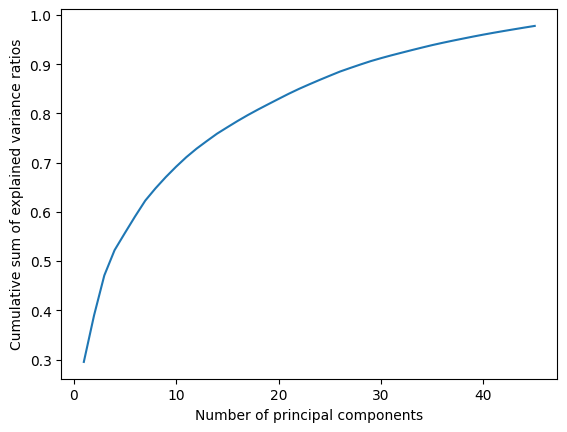

In [4486]:
# Calculate the cumulative sum of explained variance ratios using the cumsum function from numpy
cumulative_variances = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative sum of explained variance ratios using matplotlib
plt.plot(range(1, len(cumulative_variances) + 1), cumulative_variances)
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative sum of explained variance ratios")
plt.show()

range(0, 45)


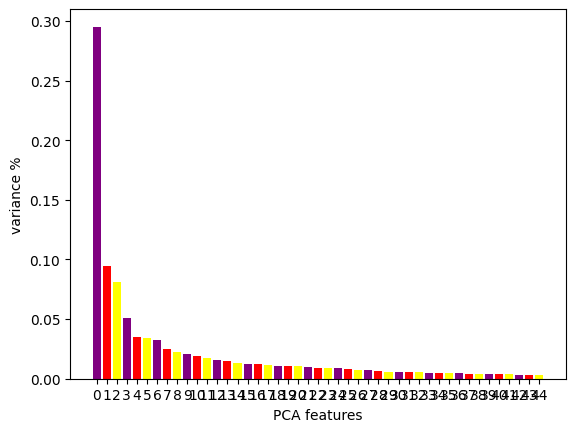

In [4524]:
# Define a list of features to be used in the plot
features = range(pca.n_components_)

# Plot the explained variances for each principal component using the bar function from matplotlib
plt.bar(features, pca.explained_variance_ratio_, color=('purple','red','yellow'))

# Add labels to the x-axis and y-axis using the xlabel and ylabel functions
plt.xlabel('PCA features')
plt.ylabel('variance %')

# Set the tick labels on the x-axis to the feature numbers using the xticks function
plt.xticks(features)

# Print the list of features
print(features)

## Save components to a DataFrame

In [4513]:
PCA_components = pd.DataFrame(pca_Components)
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.537848,-0.035220,-0.056560,0.032648,0.099548,-0.121080,-0.054140,0.003357,0.020350,-0.043943,...,-0.024002,0.009616,0.009316,-0.017413,-0.015771,-0.008403,0.015385,-0.005473,0.003651,0.008197
1,0.307380,0.009136,-0.088984,-0.020581,-0.040519,-0.076328,0.002362,0.082825,-0.048081,-0.009284,...,0.016353,0.037889,0.011152,0.013466,-0.012742,0.008246,-0.005751,0.000770,-0.000051,0.002020
2,0.307377,0.009102,-0.089009,-0.020580,-0.040522,-0.076340,0.002372,0.082821,-0.048075,-0.009267,...,0.016387,0.037851,0.011196,0.013379,-0.012720,0.008226,-0.005700,0.000767,-0.000052,0.001988
3,-0.028438,0.084251,-0.102778,-0.128006,-0.028127,0.011627,-0.018201,-0.075278,-0.062237,-0.051100,...,0.075757,0.128921,0.044249,0.026451,-0.010248,0.019281,0.002569,0.004415,-0.006118,0.006800
4,-0.149706,-0.121434,-0.000343,0.084991,-0.062061,0.036545,0.134959,0.088275,-0.062977,-0.009157,...,-0.006132,-0.019562,-0.010242,-0.013757,-0.001183,-0.010030,-0.007324,-0.016992,-0.004509,-0.006628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-0.243629,-0.117062,0.074935,-0.018885,0.133932,0.032479,0.068488,-0.002150,-0.032634,-0.024342,...,0.007459,-0.008731,0.006588,0.000636,-0.003561,-0.006574,0.001402,-0.003627,0.004544,-0.005796
3442,-0.263743,-0.062001,-0.111827,0.128734,-0.144539,-0.014978,-0.019637,0.123884,0.028551,-0.016320,...,0.005013,0.003255,-0.000020,-0.004164,-0.012141,0.003777,-0.004862,0.000914,0.003513,0.001358
3443,-0.170922,-0.110308,0.075334,-0.006718,0.066067,0.022291,0.087727,0.029098,-0.024002,-0.028395,...,-0.015741,0.022731,-0.007746,0.016553,-0.017977,0.009544,-0.015177,0.002951,-0.001127,-0.004990
3444,-0.240866,-0.108070,0.043830,-0.009824,-0.042867,-0.032102,0.002093,0.013218,-0.046409,-0.001177,...,0.011724,-0.000572,0.005304,-0.003841,-0.017726,-0.005292,0.003890,-0.005826,-0.000350,-0.004286


## Performing PCA to the features dataset "X"

In [4489]:
X = pca.fit_transform(X)

## Splitting the dataset

In [4490]:
# Split the data and target into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Print the training data and its shape
print("\ntrain data :\n", X_train, X_train.shape)

# Print the testing data and its shape
print("\ntest data :\n", X_test, X_test.shape)

# Print the training target and its shape
print("\ntrain target :\n", y_train, y_train.shape)

# Print the testing target and its shape
print("\ntest target :", y_test, y_test.shape)


train data :
 [[-0.19937435  0.03921395  0.09182268 ... -0.00930954 -0.01748444
  -0.01886634]
 [-0.19141223 -0.02895166 -0.0597452  ...  0.00482977  0.0115138
  -0.00172018]
 [-0.16614551  0.01477345 -0.05272037 ...  0.06216313  0.00647848
  -0.04968411]
 ...
 [-0.28334652 -0.03837933  0.00749852 ... -0.01229992 -0.00189587
  -0.01501963]
 [-0.25920829 -0.06948218 -0.0717862  ...  0.00817339  0.00066739
   0.04024868]
 [-0.18869497  0.00630534  0.10588686 ... -0.01278499  0.0188192
   0.01966653]] (2412, 45)

test data :
 [[-2.60149074e-01 -4.46970439e-02  6.32355016e-02 ...  8.94733059e-03
  -4.83991490e-03 -7.22273336e-06]
 [-2.41019775e-01 -4.08865869e-02 -8.41379321e-02 ...  4.26029110e-02
   2.91971151e-02 -3.12993164e-02]
 [ 7.13090172e-01  2.29559836e-01 -3.04480049e-01 ... -1.35581275e-02
   9.46964161e-03 -3.34152553e-03]
 ...
 [ 2.08886173e-01  1.33606329e-01 -3.50217444e-01 ... -1.28358828e-02
   4.26182640e-03 -1.55419608e-02]
 [ 6.19480478e-02  1.52521846e-01 -1.64962506

## Decision Tree Classifier Model

In [4491]:
# Create an instance of the DecisionTreeClassifier class
model_dt = DecisionTreeClassifier()

## Performing hyperparameter tuning

In [4525]:
# Define the hyperparameter grid to search over
param_grid = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

# Create an instance of the GridSearchCV class with the decision tree model and hyperparameter grid
grid_search = GridSearchCV(model_dt, param_grid, cv=5)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best score:  0.8358135099610834


### Passing the above mentioned parameters to model 

In [4493]:
model_dt = grid_search.best_estimator_

## Training the model

In [4494]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4)

## Predicting 

In [4495]:
y_predict_dt = model_dt.predict(X_test)

In [4496]:
print("actual target :",y_test)
print("predicted target :",y_predict_dt)

actual target : [0. 0. 1. ... 1. 1. 0.]
predicted target : [0. 0. 1. ... 1. 1. 0.]


## Model accuracy

In [4497]:
# Model Validation Accuracy
accuracy = accuracy_score(y_test,y_predict_dt)
print("accuracy : ",accuracy)

# Model Confusion Matrix
conf_mat_dt = confusion_matrix(y_test, y_predict_dt)
print("\nconfusion matrix : \n",conf_mat_dt)

# Model Classification Report
clf_report = classification_report(y_test, y_predict_dt)
print("\nClassification Report : ")
print(clf_report)

# Model Cross Validation Score
score = cross_val_score(model_dt, X, y, cv=3)
print("\nCross Validation Score : ",score)

accuracy :  0.8375241779497099

confusion matrix : 
 [[628  63]
 [105 238]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       691
         1.0       0.79      0.69      0.74       343

    accuracy                           0.84      1034
   macro avg       0.82      0.80      0.81      1034
weighted avg       0.83      0.84      0.83      1034


Cross Validation Score :  [0.83637946 0.82767624 0.74303136]


<bound method Axes.plot of <AxesSubplot:title={'center':'Confusion Matrix - Decision Tree'}, xlabel='Predicted Count', ylabel='Actual Count'>>

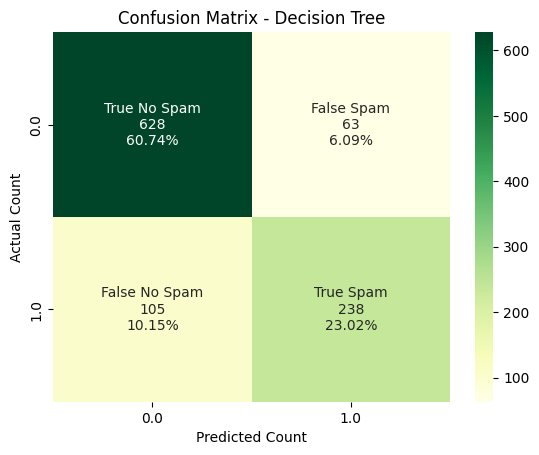

In [4498]:
# Generate the confusion matrix for the model

# The confusion_matrix function from scikit-learn is used to calculate the confusion matrix.
# The labels parameter is set to model_dt.classes_ to ensure that the labels in the confusion matrix
# match the classes in the model.
conf_mat_dt = confusion_matrix(y_test, y_predict_dt,labels=model_dt.classes_)

# calculates the group names, group counts, and group percentages for each cell in the confusion matrix.
# These values are used to create the annotations for each cell in the matrix.
group_names = ['True No Spam','False Spam',
               'False No Spam','True Spam']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat_dt.flatten()/np.sum(conf_mat_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

# the sns.heatmap function from the seaborn library is used to plot the confusion matrix with the annotations.
# The yticklabels and xticklabels parameters are set to model_dt.classes_ to ensure that the labels on the y and x axes 
# match the classes in the model. The title, xlabel, and ylabel parameters are used to set the title and labels for the 
# plot.
ax = sn.heatmap(conf_mat_dt, annot=labels,yticklabels=model_dt.classes_,xticklabels=model_dt.classes_, fmt='', cmap='YlGn')
ax.set(
                title='Confusion Matrix - Decision Tree', 
                xlabel='Predicted Count', 
                ylabel='Actual Count')
ax.plot

## K Nearest Neighbour Classifier Model

In [4499]:
model_Knn = KNeighborsClassifier()

## Performing hyperparameter tuning

In [4500]:
# Define the parameter grid for tuning the hyperparameters
param_grid_K = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Create a GridSearchCV object to tune the hyperparameters using cross-validation
grid_search_K = GridSearchCV(model_Knn, param_grid_K, cv=5)

# Fit the GridSearchCV instance to the training data
grid_search_K.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search_K.best_params_)
print("Best score: ", grid_search_K.best_score_)

Best parameters:  {'n_neighbors': 11, 'weights': 'distance'}
Best score:  0.8864041304777368


### Passing the above mentioned parameters to model 

In [4501]:
model_Knn = grid_search_K.best_estimator_

## Training the Model

In [4502]:
model_Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

## Predicting 

In [4503]:
y_predict_Knn = model_Knn.predict(X_test)

In [4504]:
print("actual target :",y_test)
print("predicted target :",y_predict_Knn)

actual target : [0. 0. 1. ... 1. 1. 0.]
predicted target : [0. 0. 1. ... 1. 1. 0.]


## Model accuracy

In [4505]:
# Model Validation Accuracy
accuracy = accuracy_score(y_test,y_predict_Knn)
print("accuracy : ",accuracy)

# Model Confusion Matrix
conf_mat_knn = confusion_matrix(y_test, y_predict_Knn)
print("\nconfusion matrix : \n",conf_mat_knn)

# Model Classification Report
clf_report = classification_report(y_test, y_predict_Knn)
print("\nClassification Report : ")
print(clf_report)

# Model Cross Validation Score
score = cross_val_score(model_Knn, X, y, cv=3)
print("\nCross Validation Score : ",score)

accuracy :  0.8839458413926499

confusion matrix : 
 [[650  41]
 [ 79 264]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       691
         1.0       0.87      0.77      0.81       343

    accuracy                           0.88      1034
   macro avg       0.88      0.86      0.87      1034
weighted avg       0.88      0.88      0.88      1034


Cross Validation Score :  [0.86335944 0.86597041 0.80400697]


<bound method Axes.plot of <AxesSubplot:title={'center':'Confusion Matrix - KNN'}, xlabel='Predicted Count', ylabel='Actual Count'>>

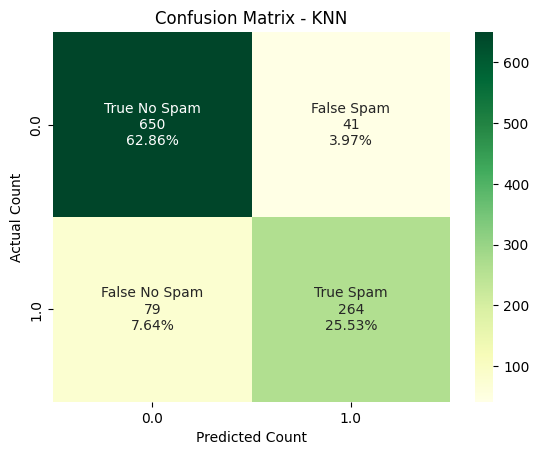

In [4506]:
# Generate the confusion matrix for the model

# The confusion_matrix function from scikit-learn is used to calculate the confusion matrix.
# The labels parameter is set to model_dt.classes_ to ensure that the labels in the confusion matrix
# match the classes in the model.
conf_mat_knn = confusion_matrix(y_test, y_predict_Knn,labels=model_Knn.classes_)

# calculates the group names, group counts, and group percentages for each cell in the confusion matrix.
# These values are used to create the annotations for each cell in the matrix.
group_names = ['True No Spam','False Spam',
               'False No Spam','True Spam']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat_knn.flatten()/np.sum(conf_mat_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

# the sns.heatmap function from the seaborn library is used to plot the confusion matrix with the annotations.
# The yticklabels and xticklabels parameters are set to model_dt.classes_ to ensure that the labels on the y and x axes 
# match the classes in the model. The title, xlabel, and ylabel parameters are used to set the title and labels for the 
# plot.
ax = sn.heatmap(conf_mat_knn, annot=labels,yticklabels=model_Knn.classes_,xticklabels=model_Knn.classes_, fmt='', cmap='YlGn')
ax.set(
                title='Confusion Matrix - KNN', 
                xlabel='Predicted Count', 
                ylabel='Actual Count')
ax.plot